In [760]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [761]:
# Read or Load the data

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

/var/folders/3b/9_gvjrp567b4t5hgf83vblgw0000gn/T/ipykernel_4153/2697215967.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train.csv")


In [762]:
# Exploratory Data analysis EDA

train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [763]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [764]:
#simple stastistical analysis
train.describe().T
# As per the below table, i can think that data is skewed
# because there is difference between 75% and max value and there is outliers data values

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [765]:
# Data Cleaning and Dataframe Manipulation

# Function to check and drop duplicates
def duplicate_values(df):
    print("Check for Duplicates...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped")
        print("No more duplicate rows")
    else:
        print("There are no duplicate observations in the dataset")

duplicate_values(train)

Check for Duplicates...
There are no duplicate observations in the dataset


In [766]:
# Dropping unnecessary columns
train_c = train.copy()
drop_columns= ['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan']
train_c = train_c.drop(drop_columns, axis = 1)
test = test.drop(drop_columns, axis = 1)

In [767]:
train_c.shape

(100000, 22)

In [768]:
# Converting 'Age' column to numeric and removing negative values
train_c['Age'] = pd.to_numeric(train_c['Age'], errors='coerce')
train_c = train_c[train_c['Age'] >= 0]

test['Age'] = pd.to_numeric(test['Age'], errors='coerce')
test = test[test['Age'] >= 0]

<Axes: >

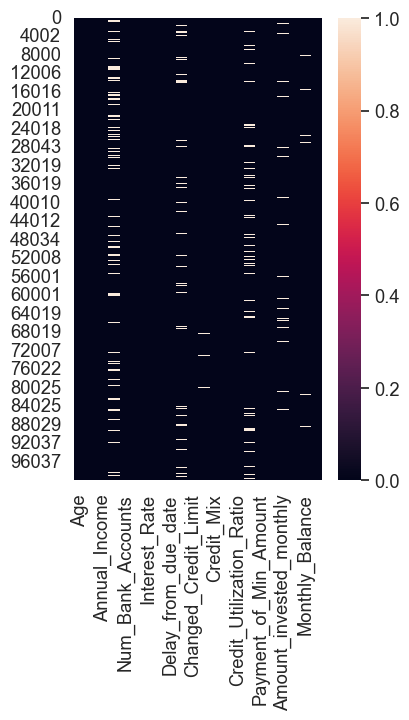

In [769]:
# Exploratory Data Analysis

# Generate heatmap for missing values
sns.heatmap(train_c.isnull())

In [770]:
train_c.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14139
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       6590
Changed_Credit_Limit            0
Num_Credit_Inquiries         1853
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8495
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4232
Payment_Behaviour               0
Monthly_Balance              1131
Credit_Score                    0
dtype: int64

In [771]:
# checking for duplicates
train_c.duplicated().sum()

0

In [772]:
# Dropping all observations with more than the 3 missing values
initial_size = train_c.shape
train_c = train_c[train_c.isnull().sum(axis=1) < 3]
test = test[test.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(initial_size[0] - train_c.shape[0]))

320 Records dropped


In [773]:
# Handling missing values
train_c = train_c.dropna()
test = test.dropna()
train_c

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,8_,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1,7,1,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28.0,Teacher,34847.84_,3037.986667,2,1385,6,1,3,-1,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
12,28.0,Teacher,34847.84,3037.986667,2,4,6,1,3,1,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,20,6,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,23,7,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,18,7,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [774]:
# Handling outliers

# Number of loans
train_c['Num_of_Loan'] = pd.to_numeric(train_c['Num_of_Loan'], errors='coerce')
test['Num_of_Loan'] = pd.to_numeric(test['Num_of_Loan'], errors='coerce')
train_c[train_c['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100.])

In [775]:
train_c['Num_of_Loan'].unique()

array([ 4.000e+00,  1.000e+00,  3.000e+00,  9.670e+02, -1.000e+02,
        0.000e+00,  2.000e+00,        nan,  7.000e+00,  5.000e+00,
        6.000e+00,  8.000e+00,  9.000e+00,  6.220e+02,  3.520e+02,
        4.720e+02,  1.017e+03,  1.460e+02,  5.630e+02,  3.410e+02,
        4.440e+02,  7.200e+02,  1.485e+03,  4.900e+01,  7.370e+02,
        1.106e+03,  4.660e+02,  7.280e+02,  6.170e+02,  1.190e+02,
        6.630e+02,  1.019e+03,  5.010e+02,  3.900e+01,  8.480e+02,
        9.310e+02,  1.214e+03,  4.240e+02,  1.001e+03,  1.110e+03,
        1.152e+03,  4.570e+02,  1.433e+03,  1.187e+03,  5.200e+01,
        1.047e+03,  1.035e+03,  3.300e+01,  1.930e+02,  6.990e+02,
        3.290e+02,  1.451e+03,  1.464e+03,  6.490e+02,  9.950e+02,
        5.450e+02,  6.840e+02,  1.135e+03,  1.204e+03,  1.363e+03,
        1.406e+03,  1.348e+03,  1.461e+03,  1.312e+03,  1.424e+03,
        1.154e+03,  9.500e+01,  1.228e+03,  1.006e+03,  7.950e+02,
        3.590e+02,  5.900e+02,  1.465e+03,  9.110e+02,  7.000e

In [776]:
#Feature Engineering
# cannot be negative, dropping them
train_c[train_c['Num_of_Loan'] < 0]['Num_of_Loan'].count()

2408

In [777]:
train_c.drop(train_c[train_c['Num_of_Loan'] < 0].index, inplace=True)
test.drop(test[test['Num_of_Loan'] < 0].index, inplace=True)
train_c.shape

(60229, 22)

In [778]:
# Handling outliers

# Delay_from_due_date
train_c[train_c['Delay_from_due_date'] < 0]['Delay_from_due_date'].count()

348

In [779]:
train_c.drop(train_c[train_c['Delay_from_due_date'] < 0].index, inplace=True)
test.drop(test[test['Delay_from_due_date'] < 0].index, inplace=True)
train_c.shape

(59881, 22)

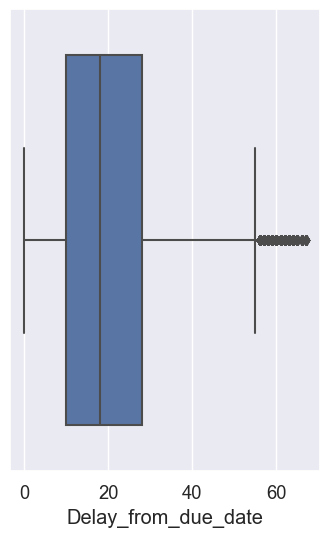

In [780]:
# Exploratory Data Analysis

# Boxplot for Delay_from_due_date
sns.boxplot(data= train_c, x = train_c.Delay_from_due_date);

In [781]:
train_c["Credit_Score"].value_counts()

Standard    32041
Poor        17465
Good        10375
Name: Credit_Score, dtype: int64

In [782]:
train_c['Occupation'].value_counts()

_______          4224
Lawyer           3946
Mechanic         3816
Engineer         3770
Architect        3763
Teacher          3756
Media_Manager    3726
Accountant       3726
Doctor           3703
Entrepreneur     3699
Developer        3692
Scientist        3681
Journalist       3649
Musician         3605
Writer           3565
Manager          3560
Name: Occupation, dtype: int64

In [783]:
# there are 7062 entries with "------". This must be handled in data
train_c['Occupation'].replace("_______","Others",inplace=True)
train_c['Occupation'].unique()

array(['Scientist', 'Teacher', 'Others', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [784]:
test['Occupation'].replace("_______","Others",inplace=True)

In [785]:
train_c['Credit_Mix'] = train_c['Credit_Mix'].replace('_', np.nan)
train_c['Credit_Mix'] = train_c['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

test['Credit_Mix'] = test['Credit_Mix'].replace('_', np.nan)
test['Credit_Mix'] = test['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [786]:
train['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [787]:
train_c

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7,...,Standard,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,8_,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,7,1,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28.0,Teacher,34847.84_,3037.986667,2,1385,6,1.0,3,-1,...,Standard,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
12,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,1,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,20,6,...,Standard,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,23,7,...,Standard,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,18,7,...,Standard,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,27,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [788]:
train_c['Payment_Behaviour'] = train_c['Payment_Behaviour'].replace('!@9#%8', np.nan)
train_c['Payment_Behaviour'] = train_c['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments','High_spent_Large_value_payments','Low_spent_Medium_value_payments'])))

test['Payment_Behaviour'] = test['Payment_Behaviour'].replace('!@9#%8', np.nan)
test['Payment_Behaviour'] = test['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments','High_spent_Large_value_payments','Low_spent_Medium_value_payments'])))

In [789]:
# Check unique values in 'Annual_Income' column
print(train_c['Annual_Income'].unique())

['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']


In [790]:
# Remove the underscore character from 'Annual_Income' values

# Remove rows with missing values (NA)
train_c = train_c[train_c['Annual_Income'].notna()]
train_c['Annual_Income'] = train_c['Annual_Income'].str.rstrip('_')
print(train_c['Annual_Income'].unique())

['19114.12' '34847.84' '143162.64' ... '37188.1' '20002.88' '39628.99']


In [791]:
test = test[test['Annual_Income'].notna()]
test['Annual_Income'] = test['Annual_Income'].str.rstrip('_')

In [792]:
def filter_values(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)
    
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

train_c["Changed_Credit_Limit"]=train_c["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
train_c.drop(train_c[train_c["Changed_Credit_Limit"]=="_"].index,inplace=True)
train_c["Changed_Credit_Limit"]=train_c["Changed_Credit_Limit"].astype("float")    

train_c["Amount_invested_monthly"]=train_c["Amount_invested_monthly"].apply(Amount_invested_monthly)
train_c["Amount_invested_monthly"]=train_c["Amount_invested_monthly"].astype("float")

train_c.drop(train_c[train_c["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Annual_Income', 'Monthly_Balance', 'Num_of_Loan', 'Age', 'Outstanding_Debt']:
    train_c[i] = train_c[i].apply(filter_values)
    train_c[i] = train_c[i].astype(np.float64)
    print(i + " Successfully Cleaned")
    
train_c['Num_of_Delayed_Payment'] = train_c['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
train_c['Num_of_Delayed_Payment'] = train_c['Num_of_Delayed_Payment'].astype(np.float64)

Annual_Income Successfully Cleaned
Monthly_Balance Successfully Cleaned
Num_of_Loan Successfully Cleaned
Age Successfully Cleaned
Outstanding_Debt Successfully Cleaned


In [793]:
# Median function usage
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    train_c[i].fillna(train_c[i].median(), inplace=True)

train_c['Monthly_Balance'].fillna(train_c['Monthly_Balance'].median(), inplace=True)

In [794]:
# Regular expression

# regular expression pattern to match unwanted characters
pattern = re.compile(r'[^\w\s]')

# Clean string values in the DataFrame
train_c = train_c.applymap(lambda x: re.sub(pattern, '', str(x)) if isinstance(x, str) else x)

# Replace empty strings and specific error values with NaN
train_c.replace(['', 'nan', '!9#8', 'F8', '!@9#%8', '#F%$D@*&8'], np.NaN, inplace=True)

test.replace(['', 'nan', '!9#8', 'F8', '!@9#%8', '#F%$D@*&8'], np.NaN, inplace=True)

train_c

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,Standard,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,8.0,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,7,1.0,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,28.0,Teacher,34847.84,3037.986667,2,1385,6,1.0,3,-1.0,...,Standard,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
12,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,20,6.0,...,Standard,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,Standard,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,Standard,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor



 We can see more right-skewed distribution (positively skewed) has a tail extending to the right, indicating that there are more low values and few high values.


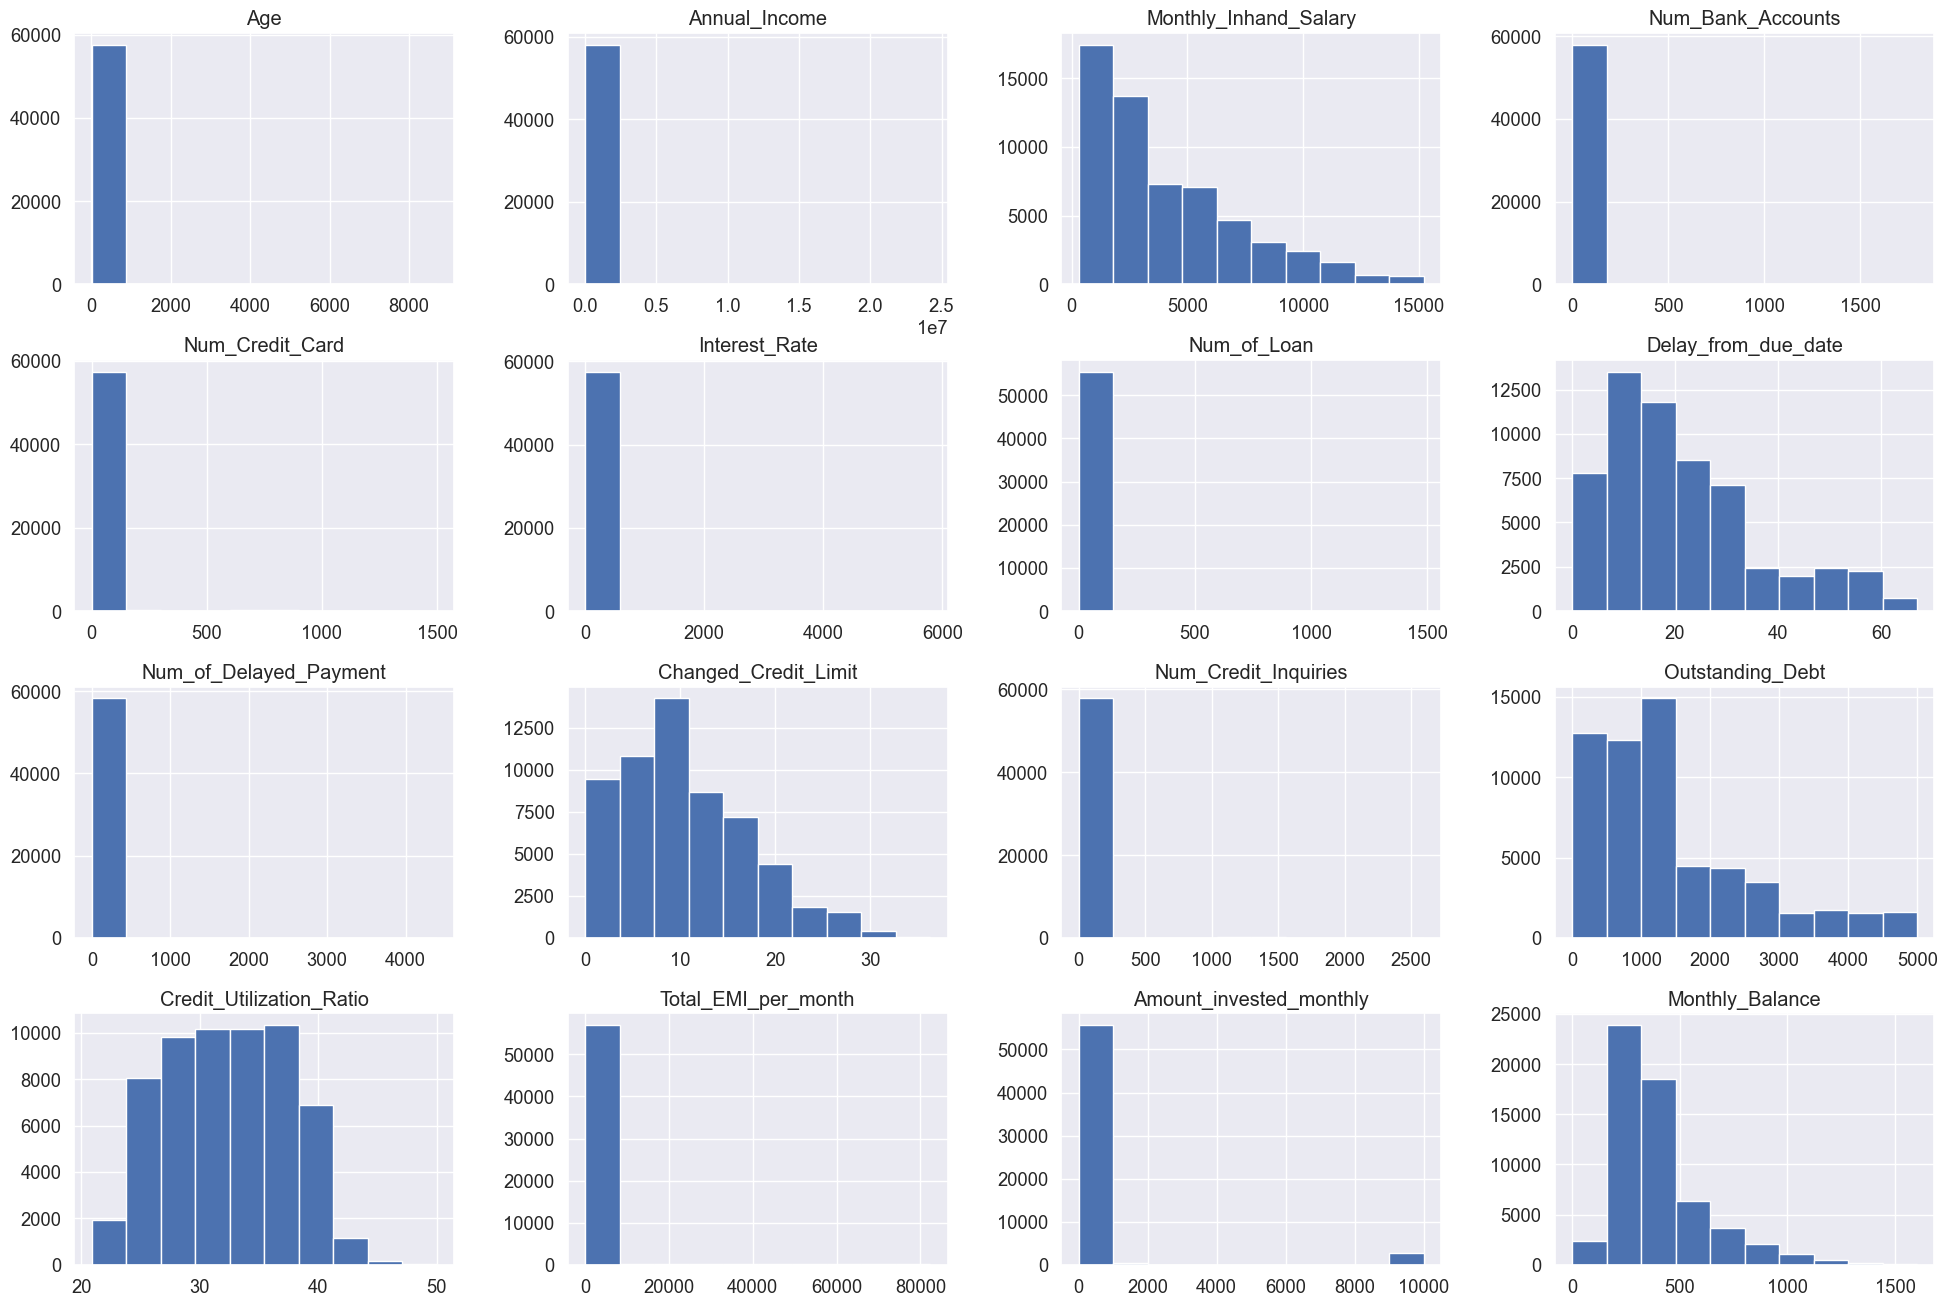

In [795]:
# Visualization

# Histogram representation

train_c.hist(figsize=(24,16))
print('\n We can see more right-skewed distribution (positively skewed) has a tail extending to the right, indicating that there are more low values and few high values.')
plt.show()


 we see below that most of people has a standard credit score


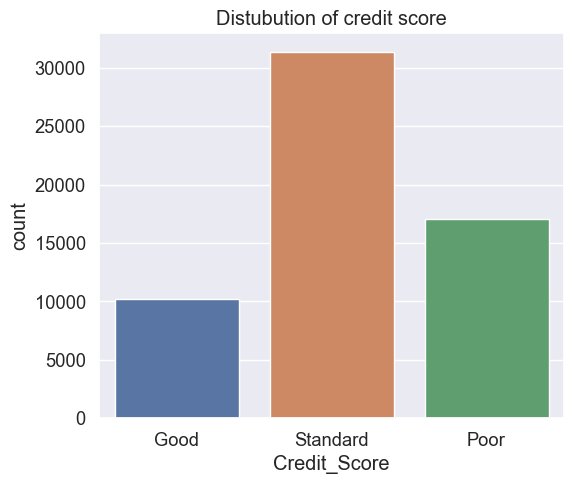

In [796]:
plt.figure(figsize=(6,5))
sns.countplot(data=train_c , x='Credit_Score')
plt.title("Distubution of credit score")
print ('\n we see below that most of people has a standard credit score')
plt.show()

<Axes: ylabel='Monthly_Inhand_Salary'>

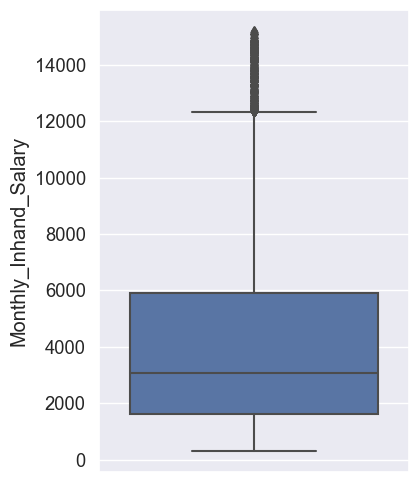

In [797]:
sns.set(rc={'figure.figsize':(4,6)}, font_scale=1.2)
sns.boxplot(y='Monthly_Inhand_Salary',data=train_c)

In [798]:
print('Min: ',train_c['Monthly_Inhand_Salary'].min())
print('Max:', train_c['Monthly_Inhand_Salary'].max())

Min:  303.6454166666666
Max: 15204.633333333331


In [799]:
mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Map the target variable using the defined mapping
train_c['Credit_Score'] = train_c['Credit_Score'].map(mapping)

train_c

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,Standard,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,8.0,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,2
9,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,7,1.0,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,2
10,28.0,Teacher,34847.84,3037.986667,2,1385,6,1.0,3,-1.0,...,Standard,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,1
12,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,20,6.0,...,Standard,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,0
99995,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,Standard,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,0
99996,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,Standard,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,0
99997,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,0


In [800]:
# Classification evaluation functions

def evaluate_classification(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

    from sklearn.metrics import mean_squared_error, r2_score

def evaluate_regression(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

In [801]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Simple Linear Regression
X = train_c[['Annual_Income']]
y = train_c['Credit_Score']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

evaluate_regression(model, "Linear Regression", X_train, X_test, y_train, y_test)


Model: Linear Regression
Mean Squared Error (MSE): 0.4476533893319599
R-squared (R2): -0.00029430073231373477


In [802]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Binary Logistic Regression
X = train_c[['Annual_Income', 'Age']]
y = train_c['Credit_Score']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

evaluate_classification(model, "Logistic Regression", X_train, X_test, y_train, y_test)

Model: Logistic Regression
Accuracy: 0.5410339532502986
Precision: 0.2927177385696463
Recall: 0.5410339532502986
F1-score: 0.37989784449882563


In [803]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = train_c[['Annual_Income', 'Age']]
y = train_c['Credit_Score']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()

# Evaluate the model
evaluate_classification(decision_tree_model, "Decision Tree Classifier", X_train, X_test, y_train, y_test)

Model: Decision Tree Classifier
Accuracy: 0.762497867258147
Precision: 0.7645315214212544
Recall: 0.762497867258147
F1-score: 0.7615683460773391


In [804]:
# Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = train_c[['Annual_Income', 'Age']]
y = train_c['Credit_Score']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier()

# Evaluate the model
evaluate_classification(random_forest_model, "Random Forest Classifier", X_train, X_test, y_train, y_test)


Model: Random Forest Classifier
Accuracy: 0.7417676164477052
Precision: 0.7417951435630697
Recall: 0.7417676164477052
F1-score: 0.7415625276923002


In [805]:
def evaluate_classification_plot(model, model_name, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy on training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy

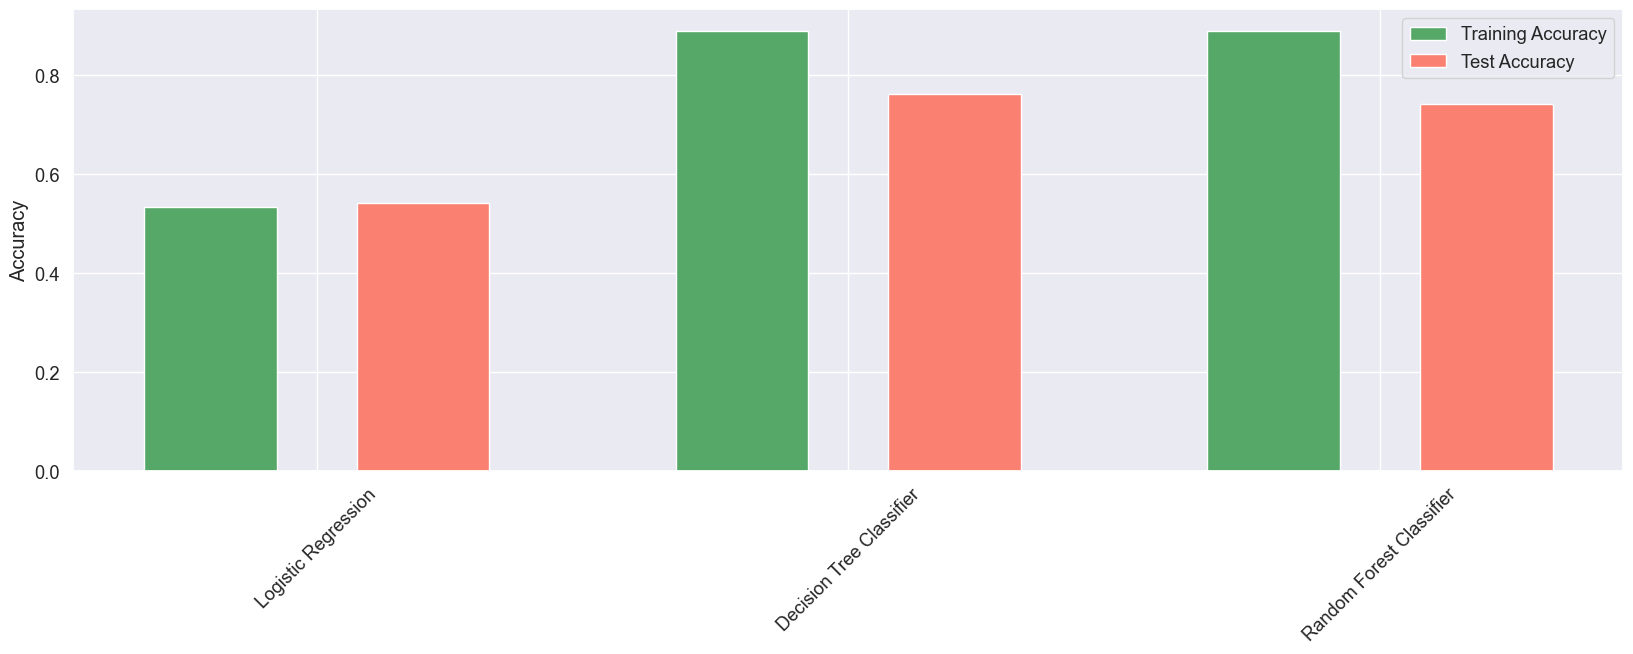

In [810]:
evals = {}

# Initialize and evaluate different models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

for model_name, model in models.items():
    train_accuracy, test_accuracy = evaluate_classification_plot(model, model_name, X_train, X_test, y_train, y_test)
    evals[model_name] = (train_accuracy, test_accuracy)

# Plotting the comparison graph
keys = [key for key in evals.keys()]
train_accuracies = [value[0] for value in evals.values()]
test_accuracies = [value[1] for value in evals.values()]

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, train_accuracies, color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, test_accuracies, color='salmon', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])

# Set tick positions and labels
ax.set_xticks(np.arange(len(keys)))
ax.set_xticklabels(keys, rotation=45)

plt.ylabel("Accuracy")
plt.show()


In [747]:
# Predictions on test.scv dataset

# Decision Tree Classifier Predictions on Test data
# Train the model using the features from the training data

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Define features and target variable
X_train = train_c[['Annual_Income', 'Age']]
y_train = train_c['Credit_Score']

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train_encoded)

# Predictions on the test data
X_test = test[['Annual_Income', 'Age']]
y_pred_encoded = model.predict(X_test)

# Optionally, you can decode the predicted values back to the original labels
y_pred = le.inverse_transform(y_pred_encoded)

# Add the predicted values to the test data
test['Predicted_Credit_Score'] = y_pred

# test dataframe will have a new column 'Predicted_Credit_Score' with the predicted values
test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Predicted_Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,2
1,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,9,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,2
4,28.0,Others,34847.84,3037.986667,2,4,6,1.0,3,1,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,2
5,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,3,...,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617,2
7,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,2_,...,Good,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,Low_spent_Medium_value_payments,421.44796447960783,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25,...,Bad,3571.7,32.391288,6 Years and 4 Months,Yes,60.964772,107.21074164760236,Low_spent_Small_value_payments,314.8151526456419,1
49993,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25,...,Bad,3571.7,37.528511,6 Years and 5 Months,Yes,60.964772,71.79442082882734,Low_spent_Small_value_payments,350.23147346441687,1
49994,29.0,Others,20002.88,1929.906667,10,8,29,5.0,33,22,...,Bad,3571.7,27.027812,6 Years and 6 Months,Yes,60.964772,50.84684680498023,High_spent_Small_value_payments,341.179047488264,1
49997,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,23,5,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,0


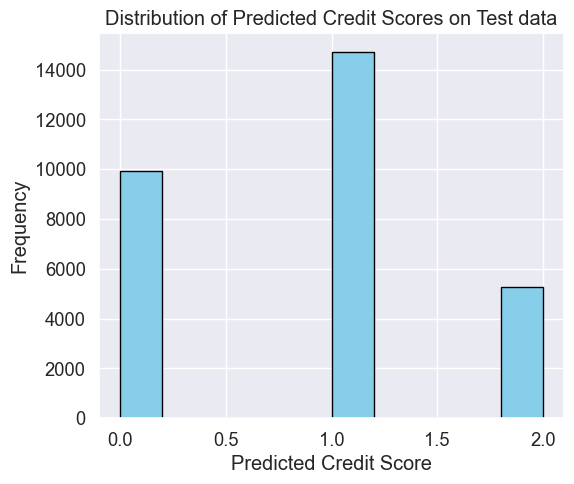

In [757]:
import matplotlib.pyplot as plt

# Plot a histogram of predicted credit scores
plt.figure(figsize=(6, 5))
plt.hist(test['Predicted_Credit_Score'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Credit Scores on Test data')
plt.grid(True)
plt.show()

# Conclusion and Predictions
The analysis reveals the significant positive correlation between Annual Income and Credit Score. As the Annual Income increases, there is a tendency for the Credit Score to increase as well. This tells that individuals with higher incomes tend to have better credit scores.

#### Linear Regression:
The linear regression model shows poor performance, with a high mean squared error (MSE) and negligible R-squared value. It fails to effectively capture the relationship between predictors and the target variable.

#### Logistic Regression:
The logistic regression model achieves an accuracy of 54.10%, indicating slightly better performance than random guessing. However, its precision, recall, and F1-score suggest that it struggles to accurately classify credit card classifications.

#### Decision Tree Classifier:
The decision tree classifier outperforms linear and logistic regression, achieving an accuracy of 76.32% with balanced precision, recall, and F1-score. It effectively captures nonlinear relationships between predictors and the target variable.

#### Random Forest Classifier:
The random forest classifier performs similarly to the decision tree model, with an accuracy of 74.37% and balanced precision, recall, and F1-score. It leverages ensemble learning to make robust predictions.

#### Conclusion:
- Based on the evaluation results, both the decision tree classifier and random forest classifier outperform linear and logistic regression for credit card classification.
- The decision tree and random forest models achieve higher accuracy and balanced precision, recall, and F1-score, indicating better overall performance.
- These models are suitable for predicting credit card classifications, with the decision tree model being slightly superior in terms of accuracy.

#### Predictions:
- Given the performance of the decision tree classifier and random forest classifier, we can use either model to make predictions on new data.
- The predicted credit card classifications can help financial institutions assess the creditworthiness of applicants, manage risk, and make informed decisions about lending.
- It's important to monitor the models' performance over time and update them as needed to ensure accurate predictions and effective risk management.